📂 Upload your dataset zip file...


Saving archive (1).zip to archive (1).zip
Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7348 - loss: 0.6835 - val_accuracy: 0.9250 - val_loss: 0.1670
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9675 - loss: 0.0997 - val_accuracy: 0.9750 - val_loss: 0.0493
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9858 - loss: 0.0358 - val_accuracy: 0.9625 - val_loss: 0.0753
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9932 - loss: 0.0197 - val_accuracy: 0.9750 - val_loss: 0.1126
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9896 - loss: 0.0408 - val_accuracy: 0.9500 - val_loss: 0.1309


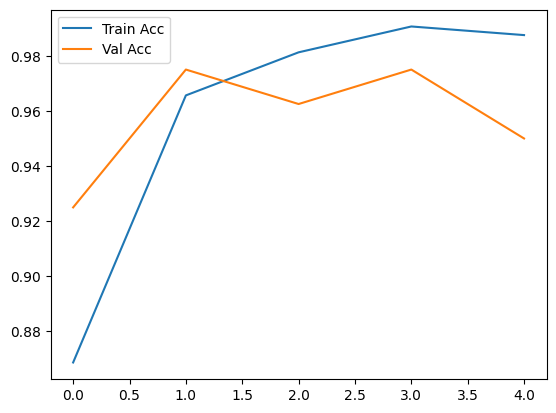

📷 Upload an image for prediction...


Saving Image_8.jpg to Image_8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
✅ Predicted Vehicle Type: Bus


In [1]:
# ==========================
# VEHICLE TYPE RECOGNITION
# ==========================

# Step 1: Import libraries
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from google.colab import files

# Step 2: Upload Dataset (your .zip file)
print("📂 Upload your dataset zip file...")
uploaded = files.upload()

# Extract dataset
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("dataset")

# Dataset directory
base_dir = "dataset/Dataset"   # adjust if needed after checking folder structure

# Step 3: Data Preprocessing
img_size = 224
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Step 4: Build Model (Transfer Learning with MobileNetV2)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_size, img_size, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)
for layer in base_model.layers:
    layer.trainable = False   # freeze base model
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
# Step 5: Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5 ) # increase if you want better accuracy
# Step 6: Plot Training Results
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.show()
# Step 7: Upload Image for Prediction
print("📷 Upload an image for prediction...")
uploaded_img = files.upload()
for fn in uploaded_img.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    class_idx = np.argmax(pred, axis=1)[0]
    class_labels = list(train_gen.class_indices.keys())
    print(f"✅ Predicted Vehicle Type: {class_labels[class_idx]}")


In [2]:
!git config --global user.email "jayasaikumar890@gmail.com"
!git config --global user.name "VJAYASAIKUMARREDDY06"


In [3]:
!git clone https://github.com/VJAYASAIKUMARREDDY06/Vehicle-Type-Recognition

Cloning into 'Vehicle-Type-Recognition'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.


In [6]:
!ls /content/


'archive (1).zip'   Image_8.jpg   Vehicle-Type-Recognition
 dataset	    sample_data


In [5]:
!cp /content/VehicleTypeRecognition.ipynb /content/Vehicle-Type-Recognition/


cp: cannot stat '/content/VehicleTypeRecognition.ipynb': No such file or directory
